dataset disponível em: https://archive.ics.uci.edu/ml/datasets/Statlog+(German+Credit+Data)

In [39]:
import pandas as pd

In [40]:
data = pd.read_csv('german_data.csv' ,sep=' ', header=None); data.head()

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,2


In [41]:
data.dtypes.value_counts()

object    13
int64      8
dtype: int64

In [42]:
qualitative_list = data.dtypes[data.dtypes == 'object'].index; qualitative_list

Int64Index([0, 2, 3, 5, 6, 8, 9, 11, 13, 14, 16, 18, 19], dtype='int64')

In [43]:
data[qualitative_list] = data[qualitative_list].astype('category')

In [44]:
data.columns = ['CheckingAcctStat', 'Duration', 'CreditHistory', 'Purpose', 'CreditAmount', 'SavingsBonds', 'Employment',
        'InstallmentRatePecnt', 'SexAndStatus', 'OtherDetorsGuarantors', 'PresentResidenceTime', 'Property', 'Age',
        'OtherInstallments', 'Housing', 'ExistingCreditsAtBank', 'Job', 'NumberDependents', 'Telephone', 'ForeignWorker',
        'CreditStatus']

In [45]:
data.head()

,CheckingAcctStat,Duration,CreditHistory,Purpose,CreditAmount,SavingsBonds,Employment,InstallmentRatePecnt,SexAndStatus,OtherDetorsGuarantors,...,Property,Age,OtherInstallments,Housing,ExistingCreditsAtBank,Job,NumberDependents,Telephone,ForeignWorker,CreditStatus
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,2


In [46]:
# Transformando variáveis numéricas em variáveis categóricas
to_factor = ['Duration', 'CreditAmount', 'Age']
for item in to_factor:
    data[item+'_f'] = pd.cut(data[item], 5)
data.head()

,CheckingAcctStat,Duration,CreditHistory,Purpose,CreditAmount,SavingsBonds,Employment,InstallmentRatePecnt,SexAndStatus,OtherDetorsGuarantors,...,Housing,ExistingCreditsAtBank,Job,NumberDependents,Telephone,ForeignWorker,CreditStatus,Duration_f,CreditAmount_f,Age_f
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A152,2,A173,1,A192,A201,1,"(3.932, 17.6]","(231.826, 3884.8]","(63.8, 75.0]"
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A152,1,A173,1,A191,A201,2,"(44.8, 58.4]","(3884.8, 7519.6]","(18.944, 30.2]"
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A152,1,A172,2,A191,A201,1,"(3.932, 17.6]","(231.826, 3884.8]","(41.4, 52.6]"
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A153,1,A173,2,A191,A201,1,"(31.2, 44.8]","(7519.6, 11154.4]","(41.4, 52.6]"
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A153,2,A173,2,A191,A201,2,"(17.6, 31.2]","(3884.8, 7519.6]","(52.6, 63.8]"


In [47]:
categorias = data.dtypes[data.dtypes == 'category'].index

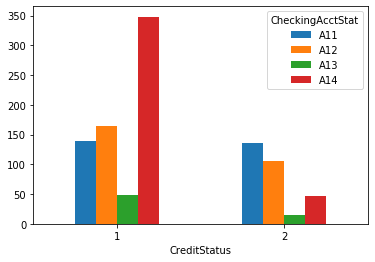

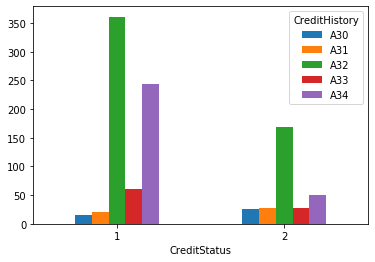

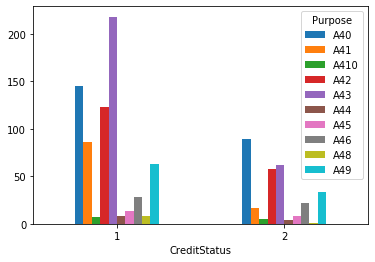

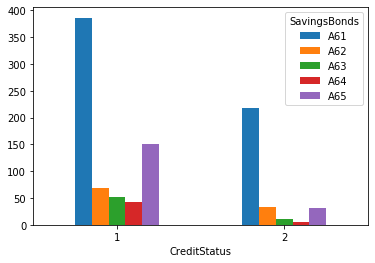

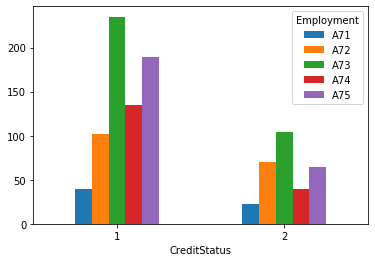

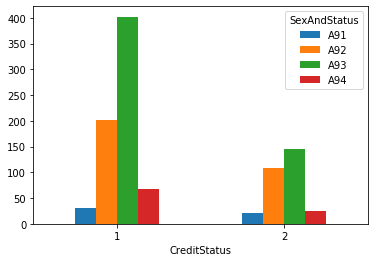

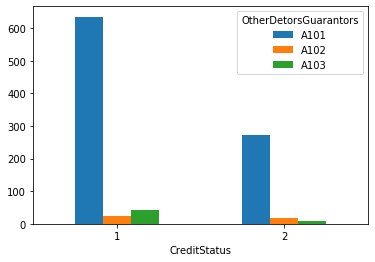

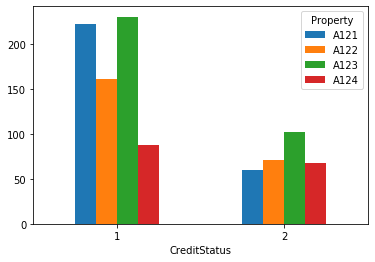

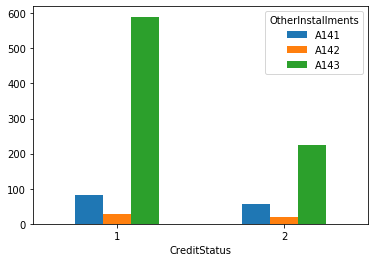

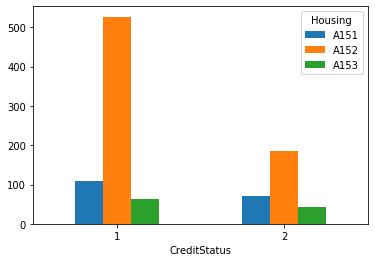

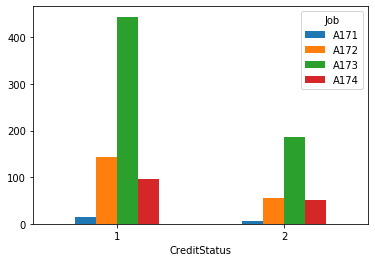

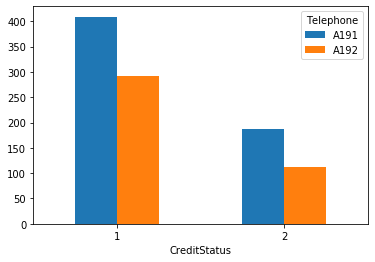

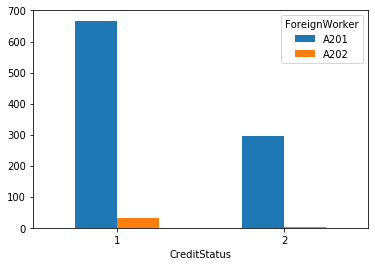

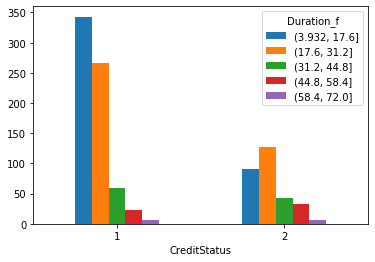

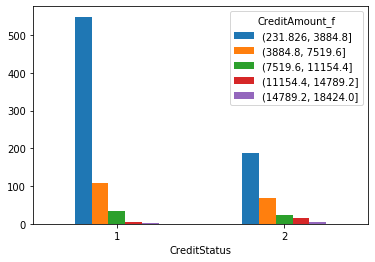

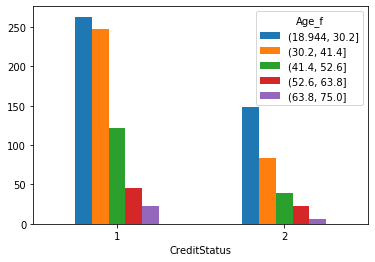

In [48]:
for categoria in data[categorias]:
    data.groupby(['CreditStatus', categoria]).size().unstack().plot(kind='bar', rot=0) # O ideal é fazer isso para todas

In [49]:
# preciso balancear os resultados para um treinamento efetivo (apenas classificação)

y = data.CreditStatus; y.value_counts()

1    700
2    300
Name: CreditStatus, dtype: int64

In [50]:
X = data.drop(['Duration', 'CreditAmount', 'Age', 'CreditStatus'], axis=1); X.head()

,CheckingAcctStat,CreditHistory,Purpose,SavingsBonds,Employment,InstallmentRatePecnt,SexAndStatus,OtherDetorsGuarantors,PresentResidenceTime,Property,OtherInstallments,Housing,ExistingCreditsAtBank,Job,NumberDependents,Telephone,ForeignWorker,Duration_f,CreditAmount_f,Age_f
0,A11,A34,A43,A65,A75,4,A93,A101,4,A121,A143,A152,2,A173,1,A192,A201,"(3.932, 17.6]","(231.826, 3884.8]","(63.8, 75.0]"
1,A12,A32,A43,A61,A73,2,A92,A101,2,A121,A143,A152,1,A173,1,A191,A201,"(44.8, 58.4]","(3884.8, 7519.6]","(18.944, 30.2]"
2,A14,A34,A46,A61,A74,2,A93,A101,3,A121,A143,A152,1,A172,2,A191,A201,"(3.932, 17.6]","(231.826, 3884.8]","(41.4, 52.6]"
3,A11,A32,A42,A61,A74,2,A93,A103,4,A122,A143,A153,1,A173,2,A191,A201,"(31.2, 44.8]","(7519.6, 11154.4]","(41.4, 52.6]"
4,A11,A33,A40,A61,A73,3,A93,A101,4,A124,A143,A153,2,A173,2,A191,A201,"(17.6, 31.2]","(3884.8, 7519.6]","(52.6, 63.8]"


In [51]:
# necessário para smotenc
categorical_columns = []
for i in range(len(X.dtypes == 'category')):
    if (X.dtypes == 'category')[i] == True: categorical_columns.append(i)
categorical_columns

[0, 1, 2, 3, 4, 6, 7, 9, 10, 11, 13, 15, 16, 17, 18, 19]

In [52]:
from collections import Counter
#from numpy.random import RandomState
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTENC

print('Original dataset shape (%s, %s)' % X.shape)

print('Original dataset samples per class {}'.format(Counter(y)))

# simulate the 2 last columns to be categorical features
sm = SMOTENC(random_state=42, categorical_features=categorical_columns)
X_res, y_res = sm.fit_resample(X, y)
print('Resampled dataset samples per class {}'.format(Counter(y_res)))

Original dataset shape (1000, 20)
Original dataset samples per class Counter({1: 700, 2: 300})
Resampled dataset samples per class Counter({1: 700, 2: 700})


In [53]:
from sklearn.model_selection import train_test_split

X = X_res
y = y_res

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.30, random_state=7849)

In [54]:
df1 = X.drop(X.iloc[:,categorical_columns], axis=1)
df2 = pd.get_dummies(X.iloc[:,categorical_columns])
dummie_df = pd.concat([df1, df2], axis=1, sort=False);
X = dummie_df

In [55]:
from sklearn.ensemble import RandomForestClassifier
#from sklearn.datasets import make_classification

clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(X, y)

RandomForestClassifier(max_depth=2, random_state=0)

In [56]:
coluna, importancia = [], []
for i in range(len(clf.feature_importances_)):
    #print(X.columns[i], '\t', clf.feature_importances_[i])
    coluna.append(X.columns[i])
    importancia.append(clf.feature_importances_[i])
pd.Series(importancia, coluna).sort_values(ascending=False).head(15)

CheckingAcctStat_A14          0.167871
SavingsBonds_A61              0.161908
CheckingAcctStat_A11          0.131985
CreditHistory_A34             0.067071
SavingsBonds_A65              0.043677
Duration_f_(3.932, 17.6]      0.039589
Age_f_(18.944, 30.2]          0.034181
Purpose_A41                   0.033836
CreditHistory_A32             0.029021
Purpose_A40                   0.024614
SexAndStatus_A92              0.023642
OtherDetorsGuarantors_A103    0.021581
Job_A173                      0.019363
SavingsBonds_A64              0.019089
SavingsBonds_A63              0.018954
dtype: float64

In [57]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=1)
clf = MLPClassifier(random_state=1, max_iter=300).fit(X_train, y_train)
clf.score(X_test, y_test)

C:\Users\cassi\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


0.7971428571428572

In [58]:
clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(15,), random_state=1)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

C:\Users\cassi\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


0.7514285714285714

In [59]:
from sklearn import svm
clf = svm.SVC() # Classification
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.8057142857142857

In [60]:
from sklearn import svm
regr = svm.SVR() # Regression
regr.fit(X_train, y_train)
regr.score(X_test, y_test)

0.4765827253100101

In [61]:
from sklearn.naive_bayes import GaussianNB # Naive Bayes
gnb = GaussianNB()
gnb.fit(X_train, y_train)
gnb.score(X_test, y_test)

0.72

Automatically created module for IPython interactive environment
Confusion matrix, without normalization
[[120  55]
 [ 23 152]]
Normalized confusion matrix
[[0.69 0.31]
 [0.13 0.87]]


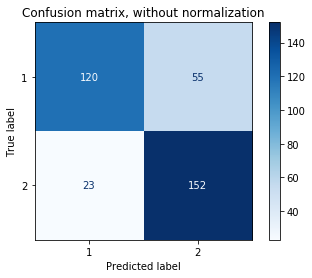

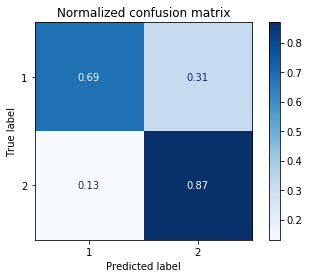

In [62]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt

from sklearn import svm, datasets
#from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix

# import some data to play with
iris = datasets.load_iris()
#X = iris.data
#y = iris.target
#class_names = iris.target_names

# Split the data into a training set and a test set
#X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# Run classifier, using a model that is too regularized (C too low) to see
# the impact on the results
classifier = svm.SVC(kernel='linear', C=0.01).fit(X_train, y_train)

np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(classifier, X_test, y_test,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

In [63]:
# Arrumaaar

print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
from sklearn.metrics import roc_auc_score

# Import some data to play with
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Binarize the output
y = label_binarize(y, classes=[0, 1, 2])
n_classes = y.shape[1]

# Add noisy features to make the problem harder
random_state = np.random.RandomState(0)
n_samples, n_features = X.shape
X = np.c_[X, random_state.randn(n_samples, 200 * n_features)]

# shuffle and split training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.5,
                                                    random_state=0)

# Learn to predict each class against the other
classifier = OneVsRestClassifier(svm.SVC(kernel='linear', probability=True,
                                 random_state=random_state))
y_score = classifier.fit(X_train, y_train).decision_function(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

Automatically created module for IPython interactive environment


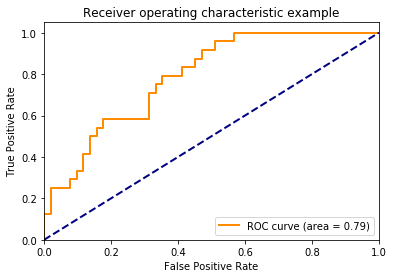

In [64]:
plt.figure()
lw = 2
plt.plot(fpr[2], tpr[2], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[2])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()